In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = '/content/drive/My Drive/dados_colab/Redes Neurais/PP2/dataAll.txt'
dt = np.dtype([('x1', float),('x2', float),('yd', float)])
data = np.fromfile(filename, dtype=dt)

In [93]:
n = 0.1 #Taxa de aprendizado
teta = 0 #Degrau usado na função de ativação
w = np.random.uniform(-0.5, 0.5, (1, 3)) #Vetor de pesos inicial
print("Vetor inicial de pesos: ", w[0])

def funcao(u): #Função de ativação
  if(u >= teta):
    return 1
  else:
    return 0

i = 0
while i < len(data): #Verificar se há necessidade de aprendizagem
  linha = data[i]
  yd = linha[2]
  x = np.array([-1, linha[0], linha[1]])

  u = 0
  for j in range(3):
    u += (x[j] * w[-1][j])

  y = funcao(u)
  e = yd - y #Erro

  if (e != 0): #Há necessidade de aprendizagem
    peso_novo = np.array([w[-1] + ((n * e) * x)])
    w = np.append(w, peso_novo, axis=0) #Começa a próxima época
    i = -1 #Vai para o começo do array de dados
    
  i += 1

print('Vetor de pesos: ', w[-1])

Vetor inicial de pesos:  [-0.34368603  0.29312489  0.13460425]
Vetor de pesos:  [  -1.84368603  388.81220489 -387.23090575]


Algoritmo de treinamento do perceptron

In [7]:
zero = np.empty((0,3), float)
for x in range(len(data)):
  if (data[x][2] == 0):
    temp = np.array([[data[x][0],data[x][1],data[x][2]]])
    zero = np.append(zero, temp, axis=0)

um = np.empty((0,3), float)
for x in range(len(data)):
  if (data[x][2] == 1):
    temp = np.array([[data[x][0],data[x][1],data[x][2]]])
    um = np.append(um, temp, axis=0)

Separando os exemplos segundos os valores de yd correspondentes as classes binárias.
* O ndarray zero corresponde a classe 0.
* O ndarray um corresponde a classe 1.

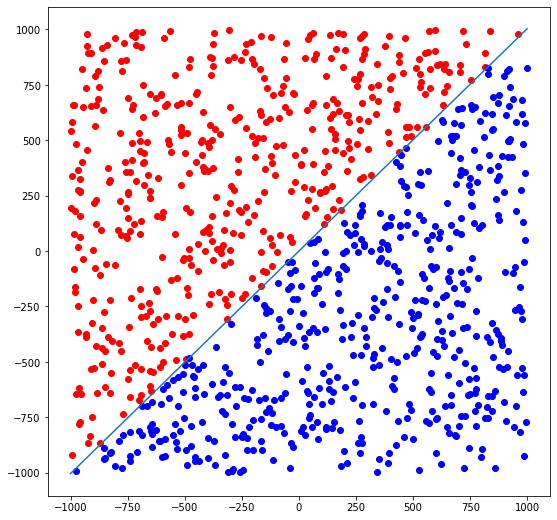

In [104]:
peso = w[-1]
x = np.arange(-1000, 1000, 1)

plt.figure(figsize=(9, 9))
plt.scatter(zero[0:,0],zero[0:,1], color='red')  #vermelho
plt.scatter(um[0:,0],um[0:,1], color='blue')     #Azul
plt.plot(x, (peso[0]/peso[2]) - ((peso[1]/peso[2]) * x))

plt.show()

#Gráfico
* A cor vermelha é correspondente a classe 0 dos valores de yd.
* A cor azul é correspondente a classe 1 dos valores de yd.